In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/My Drive/Document/DS&AI/Machine_Learning/Course_4/LDS6_NgoTrongNhan/Week_1/Chapter_2"

/content/gdrive/My Drive/Document/DS&AI/Machine_Learning/Course_4/LDS6_NgoTrongNhan/Week_1/Chapter_2


**Bước 1. Loading data**

In [3]:
import pandas as pd
data = pd.read_excel("dataset/Iris.xls")
data.head(3)

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


** Bước 2. check relationship each of feature **

In [ ]:
# cach 1: dung correlation coefficient
data.corr(method = "pearson")

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Doi voi simple linear regression --> dung regplot **

**Con doi voi multiple linear regression --> dung sns.pairplot**

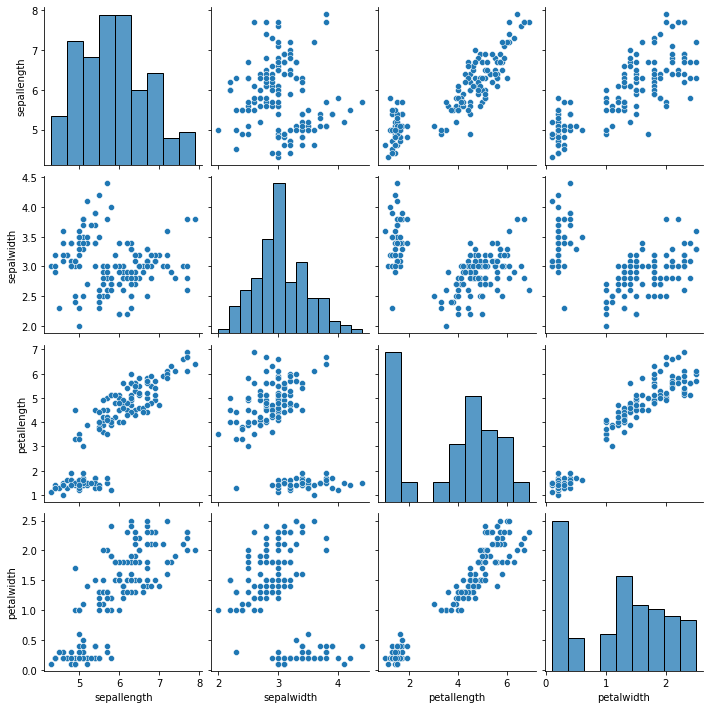

In [ ]:
sns.pairplot(data)
plt.show()

**Nhận xét**
+ Petalwidth (target) có liên quan nhiều hơn vào petallength và sepallength 
+ Peatalwidth ít mối quan hệ với sepal

**Bước 3. spliting the data to 2 dataframe with including Input/independent variable and Output/ dependent variable**

In [ ]:
inputs = data[["sepallength", "sepalwidth", "petallength"]]
inputs.head(3)

,sepallength,sepalwidth,petallength
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3


In [ ]:
output = data[["petalwidth"]]
output.head(3)

,petalwidth
0,0.2
1,0.2
2,0.2


**Bước 5. Create X_train, y_train, X_test, y_test from input and output (that has just created)**

In [ ]:
import numpy as np
import sklearn
import sklearn.model_selection # train_test_split
import sklearn.linear_model # linear regression
import sklearn.metrics # mean_squared_error, r2_score

In [ ]:
# step 1: spliting data from input and output to X_train, y_train, X_test, y_test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(inputs, output, 
                                                                            test_size = 0.2)

**Bước 6. Create and customize model**

In [ ]:
# create Linear Regression model
model = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

In [ ]:
# y = b + m_1*x_1 + m_2*x_2 + m_3_x_3 
# (with x_1, x_2, x_3 are input of sepallength, sepalwidth, petallength)
m = model.coef_
for i in range(len(m.T)):
  print ("m_%d = %.2f" %(i, m[0][i]))

m_0 = -0.19
m_1 = 0.22
m_2 = 0.51


In [ ]:
# intercept:
b = model.intercept_
print ("Intercept: %.2f" % b[0])

Intercept: -0.28


In [ ]:
# step 2: Create MSE annd Variance Score
MSE = sklearn.metrics.mean_squared_error(output, model.predict(inputs))
VS = model.score(inputs, output)

In [ ]:
print ("Mean Squared Error: %.2f" %MSE)
print ("Variance Score: %.2f" %VS)

Mean Squared Error: 0.04
Variance Score: 0.94


**Nhận xét:**
+  score --> 94% model fits with 94% --> suitable model

In [ ]:
# step 3: Chec score of training and test pharse 
# (make sure this model don't be over/underfitting)

In [ ]:
model.score(X_train, y_train)

0.9369648816818319

In [ ]:
model.score(X_test, y_test)

0.9373941484555818

In [ ]:
#both training data and testing data have high score --> choose this model

In [ ]:
y_train_hat = model.predict(X_train) # y du doan cua train
y_test_hat = model.predict(X_test) # y du doan cua test

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

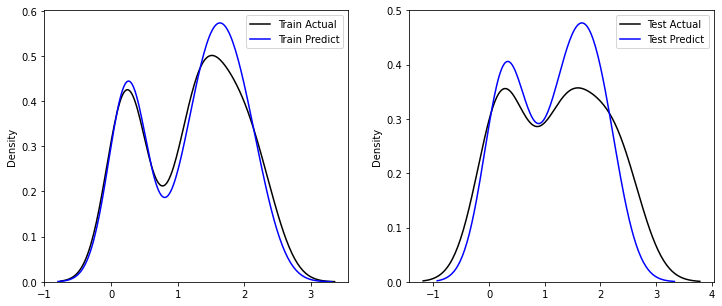

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
ax_1 = sns.distplot(y_train, hist = False, color = "black", label = "Train Actual")
sns.distplot(y_train_hat, hist = False, color = "blue", label = "Train Predict", ax = ax_1)
plt.legend()
plt.subplot(1,2,2)
ax_2 = sns.distplot(y_test, hist = False, color = "black", label = "Test Actual")
sns.distplot(y_test_hat, hist = False, color = "blue", label = "Test Predict", ax= ax_2)
plt.legend()
plt.show()